# Binary - Perceptron
----

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

## implementing AND function using perceptron

<Figure size 200x200 with 0 Axes>

(-0.5, 1.5)

(-0.5, 1.5)

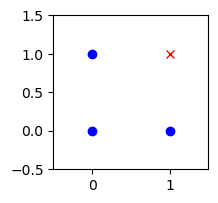

In [7]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])
plt.figure(figsize=(2,2))
plt.plot(X[y==0,0],X[y==0,1],'o',color='b')
plt.plot(X[y==1,0],X[y==1,1],'x',color='r')
plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)
plt.show()

In [8]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
X.shape, y.shape

(torch.Size([4, 2]), torch.Size([4]))

Loss (Misclassified ) :  2


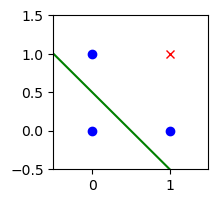

In [89]:
class Perceptron():
    def __init__(self):
        self.weights = torch.tensor([1.0,1.0])
        self.bias = torch.tensor(-0.5)
    
    def forward(self, x):
        out = x @ self.weights.T + self.bias
        return out > 0 
    
    def parameters(self):
        return [self.weights]
    
    def __call__(self, X):
        return self.forward(X)
    
model = Perceptron()

def boolLossFunction(y_pred, y):
    return (y_pred != y).sum()

y_pred = model(X)
loss = boolLossFunction(y_pred, y)
print('Loss (Misclassified ) : ',loss.item())

def plot_result(model, X, y):
    plt.figure(figsize=(2,2))
    plt.plot(X[y==0,0],X[y==0,1],'o',color='b')
    plt.plot(X[y==1,0],X[y==1,1],'x',color='r')
    
    x = np.linspace(-0.5, 1.5, 100)
    y = (-model.bias.item() - model.weights[0].item() * x) / model.weights[1].item()
    plt.plot(x, y, '-g')
    
    plt.xlim(-0.5,1.5)
    plt.ylim(-0.5,1.5)
    plt.show()


plot_result(model, X, y)

2

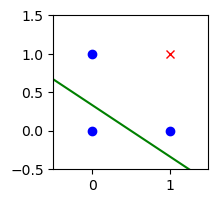

In [90]:
model.weights = torch.tensor([1.0,1.5])
boolLossFunction(model(X), y).item() 
plot_result(model, X, y)

2

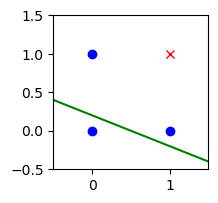

In [91]:
model.weights = torch.tensor([1.0,2.5])
boolLossFunction(model(X), y).item() 
plot_result(model, X, y)

2

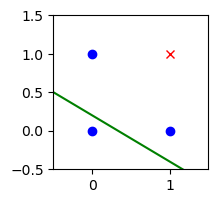

In [92]:
model.weights = torch.tensor([1.5,2.5])
boolLossFunction(model(X), y).item() 
plot_result(model, X, y)

2

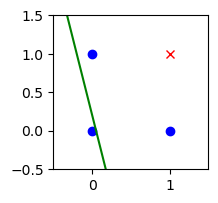

In [93]:
model.weights = torch.tensor([10,2.5])
boolLossFunction(model(X), y).item() 
plot_result(model, X, y)

0

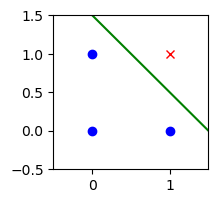

In [94]:
model.weights = torch.tensor([2.0,2.0])
model.bias = torch.tensor(-3.0)
boolLossFunction(model(X), y).item() 
plot_result(model, X, y)

In [95]:
y_predo = model(X).squeeze() 
y_predo

tensor([False, False, False,  True])

## Perceptron Learning Algorithm

Step: 0 Loss:2


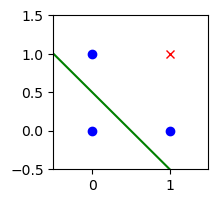

Step: 1 Loss:1
Step: 2 Loss:1
Step: 3 Loss:1
Step: 4 Loss:1


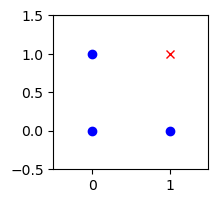

Step: 5 Loss:2
Step: 6 Loss:0

Final Weights: tensor([1., 1.]) Final Bias: -1.5
Steps taken: 6
loss : 0
Final Model : 


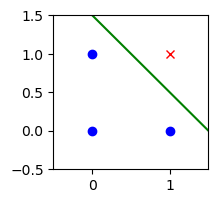

In [102]:
def perceptron_learning_algorithm(model, X, y):
    steps_taken = 0
    while True:
        y_pred = model(X).squeeze()
        loss = boolLossFunction(y_pred, y)
        print(f'Step: {steps_taken} Loss:{loss.item()}')
        if steps_taken %4 == 0:
            plot_result(model, X, y)
        if loss == 0:
            break

        r = np.random.randint(len(X))
        x = X[r]
        if y[r] == 1:
            if not model(x):
                model.weights += x
                model.bias += 1
        else:
            if model(x):
                model.weights -= x
                model.bias -= 1
        steps_taken+=1
    return steps_taken

model = Perceptron()
steps = perceptron_learning_algorithm(model, X, y)
print(f'\nFinal Weights: {model.weights} Final Bias: {model.bias}')
print(f'Steps taken: {steps}')
print(f'loss : {boolLossFunction(model(X), y).item()}')
print('Final Model : ')
plot_result(model, X, y)


## XOR 
we can't sepearte with single perceptron

## Thus using MLP

In [126]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

class Perceptron():
    def __init__(self, input_size,isbias = True,bias = 1.0):
        self.weights = torch.tensor([1.0 for _ in range(input_size)], dtype=torch.float32)
        if isbias:
            self.bias = torch.tensor(bias, dtype=torch.float32)
        else:
            self.bias = None
    
    def forward(self, x):
        out = x @ self.weights.T
        if self.bias is not None:
            out += self.bias
        return out
    
    def parameters(self):
        return [self.weights, self.bias]
    
    def __call__(self, X):
        return self.forward(X)

class SingleLayerPerceptron:
    def __init__(self, input_size):
        self.perceptrons = 2**input_size
        self.hidden = [Perceptron(input_size, bias = -2) for _ in range(self.perceptrons)]
        per = 0
        for i in (-1.0,1.0):
            for j in (-1.0,1.0):
                self.hidden[per].weights = torch.tensor([i,j], dtype=torch.float32)
                per +=1
        self.output = Perceptron(self.perceptrons, isbias=False)
        self.output.weights = torch.randn(self.perceptrons, dtype=torch.float32)
        
    def forward(self, x):
        out = torch.stack([h(x) for h in self.hidden], dim=1)
        out = self.output(out)
        out = sigmoid(out)
        return out
    
    def parameters(self):
        return self.output.parameters()
    
    def __call__(self, X):
        return self.forward(X)
    
X = np.array([[-1,-1],[-1,1],[1,-1],[1,1]])
y = np.array([0,1,1,0])
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)


model = SingleLayerPerceptron(X.shape[1])
print(f'perceptrons count : {model.perceptrons}')
model(X)

perceptrons count : 4


tensor([0.9997, 0.8930, 0.9993, 0.8036])

In [121]:
model.hidden[0].weights, model.hidden[1].weights , model.hidden[2].weights, model.hidden[3].weights

(tensor([-1., -1.]), tensor([-1.,  1.]), tensor([ 1., -1.]), tensor([1., 1.]))

In [127]:
def SLNloss(y_pred, y):
    return ((y_pred - y)**2).sum()

SLNloss(model(X), y)

tensor(1.6566)

# Real - Perceptron

## implementing AND function using real valued perceptron 

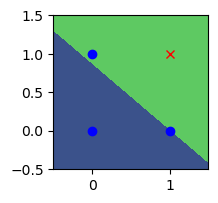

In [ ]:
class Perceptron():
    def __init__(self,inputs = 2):
        self.weights = torch.randn(inputs)
        self.bias = torch.randn(1)
    
    def forward(self, x):
        out = x @ self.weights.T + self.bias
        return out
    
    def parameters(self):
        return [self.weights,self.bias]
    
    def __call__(self, X):
        return self.forward(X)
    
model = Perceptron()

def reallLossFunction(y_pred, y):
    return ((y_pred - y)**2).sum()

def plot_result(model, X, y):
    plt.figure(figsize=(2,2))
    plt.plot(X[y==0,0],X[y==0,1],'o',color='b')
    plt.plot(X[y==1,0],X[y==1,1],'x',color='r')
    x = np.linspace(-0.5,1.5,100)
    y = np.linspace(-0.5,1.5,100)
    X, Y = np.meshgrid(x,y)
    Z = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i,j] = model(torch.tensor([X[i,j],Y[i,j]],dtype=torch.float32)).item()
    plt.contourf(X,Y,Z,levels=0)

    plt.xlim(-0.5,1.5)
    plt.ylim(-0.5,1.5)
    plt.show()

plot_result(model, X, y)

In [108]:
reallLossFunction(model(X).squeeze(), y).item() 

4.152018070220947